In [1]:
import re
import nltk
import time
import tweepy
import pprint
import pickle
import numpy as np
from tweepy import OAuthHandler
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Initializing the API keys

#Consumer Keys
consumer_key = 'BlcWOXcdx1lncUgficpIZIy04'
consumer_secret = 'zU1yh41jrHAUsI4e8tebIlDILPaDzq3c4f16XIoQ4cjwtTFqHP'

#Generated API Tokens
access_token = '872711709089312768-i9jVGBQtmG7QK9Q2rSzmg7ae7b5zJAd'
access_secret = 'WvJcOggg6n1dccmUrIf3k6vUgD78c7aqGRfotvOEacmkW'

In [3]:
#Client Authentication
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
#Setting up our search token
args = ['CoronaVirus']

#If it doesnot get any tweets then after 10sec it will timeout
api = tweepy.API(auth, timeout = 10)

In [4]:
#Fetching the top 1000 recent Tweets
start = time.time()
list_tweets = []

#Lenght of args is always is 1
query = args[0]
if len(args) == 1:
    
    #Cursor is another class it is used to fetch the tweets
    #api.search because we are only search
    #q=query+" -filter:retweets" based on agrs[0] and we are filtering the same retweets
    #lang means we are only fetching english tewwts
    # result_type = 'recent' means we are looking for recent tweets
    for status in tweepy.Cursor(api.search, 
                                q=query+" -filter:retweets",
                                lang = 'en',
                                result_type = 'recent').items(1000):
        list_tweets.append(status.text)
end = time.time()
print("Total Time Taken to fetch tweets: {}".format(end-start))

Total Time Taken to fetch tweets: 18.164862394332886


##Printing the Fetched Tweets

In [5]:
pp = pprint.PrettyPrinter(width=120, compact=True)
pp.pprint(list_tweets)

['@NBCPolitics “NEW: Kimberly Guilfoyle, who is getting paid by the Trump campaign to bang Donald Trump Jr., tests po… '
 'https://t.co/z99Dpo7wYW',
 '@MollyJongFast So far smugness has shown to be ineffective at stopping the coronavirus.',
 '@KatRamsland Trump Uses Mount Rushmore Speech to Deliver Divisive Culture War Message https://t.co/ifp1MsKXOZ',
 '@Philip_Davis_NY United States Coronavirus: 2,892,476 Cases and 132,129 Deaths - Worldometer - '
 'https://t.co/fkFuKoqJXV',
 'Should KCET be postponed or be held amidst the coronavirus scare on July 30th and 31st ?',
 "Basically what's happening is there's a huge spike in cases bc we are testing more than anywhere else, and positive… "
 'https://t.co/OMjFPHB4uG',
 'Breaking news: Another #Coronavirus record for  #Florida  https://t.co/kKB5xmxUh6',
 '&lt; About a third of Covid19 deaths have been in care homes.&gt;\n'
 '\n'
 "Coronavirus: Almost 30,000 'excess' care homes deaths… https://t.co/S2I7i7XET1",
 '"All over the world people a

In [6]:
from google.colab import files
uploaded = files.upload()

Saving classifier.pickle to classifier.pickle
Saving tfidfmodel.pickle to tfidfmodel.pickle


##Loading the Pretrained model and Vectorizer

In [7]:
#Vectorizer
with open('/content/tfidfmodel.pickle', 'rb') as f:
    vectorizer = pickle.load(f)
    
#Model
with open('/content/classifier.pickle', 'rb') as f:
    classifier = pickle.load(f)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.19.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.19.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:31

##Preprocessing the Data

In [8]:
total_pos = 0
total_neg = 0

for tweet in list_tweets:
    #Removing all the hyper links
    # ^ means from start and $ means from last
    tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", tweet)
    #Puntuation
    tweet = re.sub(r"\W"," ",tweet)
    #numbers
    tweet = re.sub(r"\d"," ",tweet)
    #Single alphabets 
    # ^ means from start and $ means from last
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    #Vaccent Spaces
    tweet = re.sub(r"\s+"," ",tweet)
    #Lower Casing
    tweet = tweet.lower()
    #Replacing Contraction with full words
    tweet = re.sub(r"that's","that is",tweet)
    tweet = re.sub(r"there's","there is",tweet)
    tweet = re.sub(r"what's","what is",tweet)
    tweet = re.sub(r"where's","where is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"who's","who is",tweet)
    tweet = re.sub(r"i'm","i am",tweet)
    tweet = re.sub(r"she's","she is",tweet)
    tweet = re.sub(r"he's","he is",tweet)
    tweet = re.sub(r"they're","they are",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"ain't","am not",tweet)
    tweet = re.sub(r"wouldn't","would not",tweet)
    tweet = re.sub(r"shouldn't","should not",tweet)
    tweet = re.sub(r"can't","can not",tweet)
    tweet = re.sub(r"couldn't","could not",tweet)
    tweet = re.sub(r"won't","will not",tweet)
    
    #Pretty Printing
    pp.pprint(tweet)
    print(len(tweet))

     #Predicting The Reslts
    sent = classifier.predict(vectorizer.transform([tweet]).toarray())
    if sent[0] == 1:
        total_pos += 1
    else:
        total_neg += 1

' nbcpolitics new kimberly guilfoyle who is getting paid by the trump campaign to bang donald trump jr tests po '
111
' mollyjongfast so far smugness has shown to be ineffective at stopping the coronavirus '
87
' katramsland trump uses mount rushmore speech to deliver divisive culture war message '
86
' philip_davis_ny united states coronavirus cases and deaths worldometer '
72
'should kcet be postponed or be held amidst the coronavirus scare on july th and st '
83
'basically what happening is there a huge spike in cases bc we are testing more than anywhere else and positive '
111
'breaking news another coronavirus record for florida '
53
' lt about third of covid deaths have been in care homes gt coronavirus almost excess care homes deaths '
103
' all over the world people are pointing fingers driven by their fears and anxieties to go after the other '
106
' anacabrera it now central floriduh here '
41
' govabbott this is direct result of your failure to lead redeem yourself and make 

In [9]:
print("Positive Reviews: {}".format(total_pos))
print("Negative Reviews: {}".format(total_neg))

Positive Reviews: 690
Negative Reviews: 310


In [10]:
#Accuracy
print("Accuracy score is {}%".format((total_pos / 1000)*100))

Accuracy score is 69.0%


##Plotting The Results

Text(0.5, 1.0, 'Number of Postive and Negative Tweets')

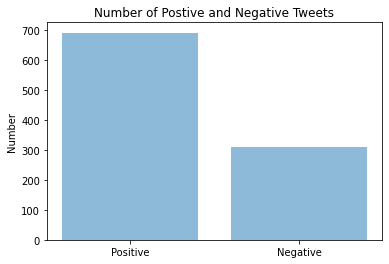

In [12]:
# Visualizing the results
objects = ['Positive','Negative']
y_pos = np.arange(len(objects))

plt.bar(y_pos,[total_pos,total_neg],alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Number of Postive and Negative Tweets')